# Driver Identification using ResNet50 and GRU (RNN) at different seeds

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight

import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import random_split, DataLoader

from src.engine import ResNet50_GRU_engine
from src.model_driverID import ResNet50_GRU
from src.dataset import FeatureMapDatasetImproved, FeatureMapDatasetNORoT

**Getting the seeds**

In [2]:
np.random.seed(0)

np.random.randint(low=0, high=200, size=4)

array([172,  47, 117, 192])

compute class weights

In [3]:
y_train = pd.read_csv('./data/feature_maps_labels/train/metadata.csv')
y_train = y_train.iloc[:,1].values

class_weights = torch.tensor(compute_class_weight('balanced', classes=np.unique(y_train), y=y_train), dtype=torch.float32)
class_weights = class_weights.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

del y_train

In [4]:
from src.plot import plot_history

### Seed 172 
This time I'm using the dataset class with the same augmentation as I used for the MTL model to allow for a fair comparison.

In [5]:
base_dir = './data/feature_maps_labels/'
np.random.seed(172)

train_datasets = FeatureMapDatasetImproved(base_dir, mode='train', rescale=False, augment=True)
val_test_datasets = FeatureMapDatasetImproved(base_dir, mode='valid', rescale=False, augment=True)

valid_datasets, test_datasets = random_split(val_test_datasets, [0.5, 0.5])

batch_size = 32
train_dl = DataLoader(train_datasets, batch_size, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_datasets, batch_size, shuffle=True, num_workers=4)
test_dl = DataLoader(test_datasets, batch_size, shuffle=False, num_workers=2)

In [6]:
np.random.seed(172)

criterion = nn.CrossEntropyLoss(weight=class_weights)
model = ResNet50_GRU(hidden_size=1024, num_layers=2, dropout=0.7, unfreeze_L3=True, unfreeze_L4=True)
optimizer = optim.Adam(model.parameters(), lr=0.00132603, weight_decay=0.00111036)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.304855)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

In [7]:
engine = ResNet50_GRU_engine(model, optimizer, scheduler, criterion, device)

Train time: 160mins 32.1secs

In [8]:
np.random.seed(172)

seed_172_hist = engine.train_validation(train_dl, valid_dl, epochs=30, save_path='./model_checkpoint/seed_172_driver1D_ResNet50GRU_chkpt.pth')

np.save('./model_checkpoint/seed_172_driver1D_ResNet50GRU_history.npy', np.array(seed_172_hist))

   Epoch [1/30], Train Loss: 1.3655, Train Accuracy: 55.96%, Val Loss: 1.2720, Val Accuracy: 75.56%
   Epoch [2/30], Train Loss: 1.2124, Train Accuracy: 70.24%, Val Loss: 1.1729, Val Accuracy: 71.15%
   Epoch [3/30], Train Loss: 1.1593, Train Accuracy: 71.21%, Val Loss: 1.1205, Val Accuracy: 73.56%
   Epoch [4/30], Train Loss: 1.1230, Train Accuracy: 72.76%, Val Loss: 1.0866, Val Accuracy: 72.40%
   Epoch [5/30], Train Loss: 1.1040, Train Accuracy: 72.76%, Val Loss: 1.0734, Val Accuracy: 72.79%
   Epoch [6/30], Train Loss: 1.0988, Train Accuracy: 72.80%, Val Loss: 1.0801, Val Accuracy: 73.12%
   Epoch [7/30], Train Loss: 1.0929, Train Accuracy: 73.24%, Val Loss: 1.0686, Val Accuracy: 72.81%
   Epoch [8/30], Train Loss: 1.0940, Train Accuracy: 73.25%, Val Loss: 1.0718, Val Accuracy: 73.05%
   Epoch [9/30], Train Loss: 1.0928, Train Accuracy: 73.35%, Val Loss: 1.0807, Val Accuracy: 74.20%
   Epoch [10/30], Train Loss: 1.0910, Train Accuracy: 73.31%, Val Loss: 1.0715, Val Accuracy: 72.73%

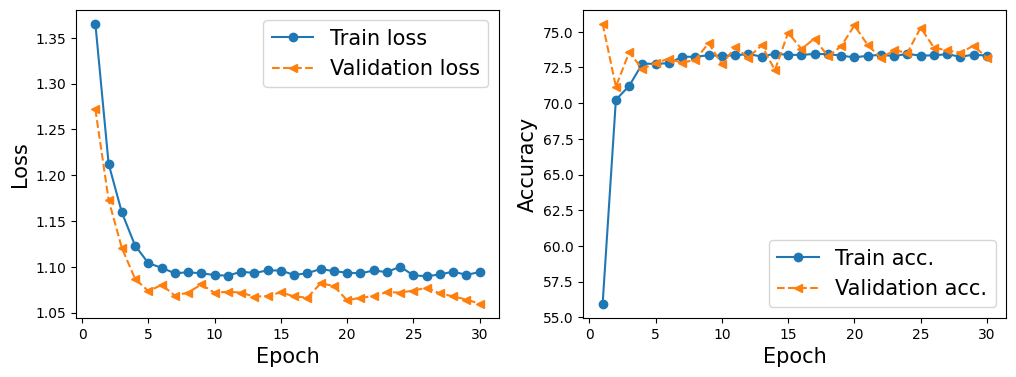

In [9]:
plot_history(seed_172_hist)

In [10]:
engine.test(test_dl)

Test Accuracy: 0.7265179034769071


0.7265179034769071

### Seed 47
This time I'm using the dataset class with the same augmentation as I used for the MTL model to allow for a fair comparison.

In [11]:
base_dir = './data/feature_maps_labels/'
np.random.seed(47)

train_datasets = FeatureMapDatasetImproved(base_dir, mode='train', rescale=False, augment=True)
val_test_datasets = FeatureMapDatasetImproved(base_dir, mode='valid', rescale=False, augment=True)

valid_datasets, test_datasets = random_split(val_test_datasets, [0.5, 0.5])

batch_size = 32
train_dl = DataLoader(train_datasets, batch_size, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_datasets, batch_size, shuffle=True, num_workers=4)
test_dl = DataLoader(test_datasets, batch_size, shuffle=False, num_workers=2)

In [12]:
np.random.seed(47)

criterion = nn.CrossEntropyLoss(weight=class_weights)
model = ResNet50_GRU(hidden_size=1024, num_layers=2, dropout=0.7, unfreeze_L3=True, unfreeze_L4=True)
optimizer = optim.Adam(model.parameters(), lr=0.00132603, weight_decay=0.00111036)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.304855)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

In [13]:
engine = ResNet50_GRU_engine(model, optimizer, scheduler, criterion, device)

Train time: 159mins 6.3s

In [14]:
np.random.seed(47)

seed_47_hist = engine.train_validation(train_dl, valid_dl, epochs=30, save_path='./model_checkpoint/seed_47_driver1D_ResNet50GRU_chkpt.pth')

np.save('./model_checkpoint/seed_47_driver1D_ResNet50GRU_history.npy', np.array(seed_47_hist))

   Epoch [1/30], Train Loss: 1.3634, Train Accuracy: 56.92%, Val Loss: 1.2708, Val Accuracy: 66.45%
   Epoch [2/30], Train Loss: 1.1991, Train Accuracy: 69.61%, Val Loss: 1.1455, Val Accuracy: 68.99%
   Epoch [3/30], Train Loss: 1.1389, Train Accuracy: 71.23%, Val Loss: 1.1317, Val Accuracy: 75.94%
   Epoch [4/30], Train Loss: 1.1257, Train Accuracy: 72.12%, Val Loss: 1.0960, Val Accuracy: 70.25%
   Epoch [5/30], Train Loss: 1.1125, Train Accuracy: 72.50%, Val Loss: 1.0934, Val Accuracy: 73.18%
   Epoch [6/30], Train Loss: 1.1044, Train Accuracy: 71.92%, Val Loss: 1.0930, Val Accuracy: 72.09%
   Epoch [7/30], Train Loss: 1.0944, Train Accuracy: 73.00%, Val Loss: 1.1010, Val Accuracy: 72.41%
   Epoch [8/30], Train Loss: 1.0977, Train Accuracy: 72.81%, Val Loss: 1.1020, Val Accuracy: 72.05%
   Epoch [9/30], Train Loss: 1.0990, Train Accuracy: 72.82%, Val Loss: 1.1009, Val Accuracy: 73.24%
   Epoch [10/30], Train Loss: 1.0983, Train Accuracy: 72.70%, Val Loss: 1.0919, Val Accuracy: 72.97%

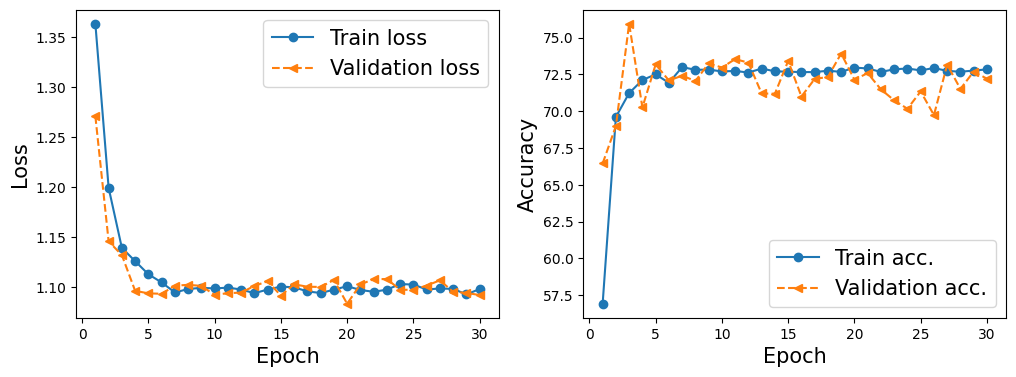

In [15]:
plot_history(seed_47_hist)

In [16]:
engine.test(test_dl)

Test Accuracy: 0.735512887043764


0.735512887043764

### Seed 117
This time I'm using the dataset class with the same augmentation as I used for the MTL model to allow for a fair comparison.

In [17]:
base_dir = './data/feature_maps_labels/'
np.random.seed(117)

train_datasets = FeatureMapDatasetImproved(base_dir, mode='train', rescale=False, augment=True)
val_test_datasets = FeatureMapDatasetImproved(base_dir, mode='valid', rescale=False, augment=True)

valid_datasets, test_datasets = random_split(val_test_datasets, [0.5, 0.5])

batch_size = 32
train_dl = DataLoader(train_datasets, batch_size, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_datasets, batch_size, shuffle=True, num_workers=4)
test_dl = DataLoader(test_datasets, batch_size, shuffle=False, num_workers=2)

In [18]:
np.random.seed(117)

criterion = nn.CrossEntropyLoss(weight=class_weights)
model = ResNet50_GRU(hidden_size=1024, num_layers=2, dropout=0.7, unfreeze_L3=True, unfreeze_L4=True)
optimizer = optim.Adam(model.parameters(), lr=0.00132603, weight_decay=0.00111036)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.304855)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

In [19]:
engine = ResNet50_GRU_engine(model, optimizer, scheduler, criterion, device)

Train time: 152mins 38.4s

In [20]:
np.random.seed(117)

seed_117_hist = engine.train_validation(train_dl, valid_dl, epochs=30, save_path='./model_checkpoint/seed_117_driver1D_ResNet50GRU_chkpt.pth')

np.save('./model_checkpoint/seed_117_driver1D_ResNet50GRU_history.npy', np.array(seed_117_hist))

   Epoch [1/30], Train Loss: 1.3329, Train Accuracy: 61.87%, Val Loss: 1.2967, Val Accuracy: 68.33%
   Epoch [2/30], Train Loss: 1.2133, Train Accuracy: 70.29%, Val Loss: 1.1733, Val Accuracy: 71.38%
   Epoch [3/30], Train Loss: 1.1770, Train Accuracy: 72.62%, Val Loss: 1.1610, Val Accuracy: 70.36%
   Epoch [4/30], Train Loss: 1.1458, Train Accuracy: 72.19%, Val Loss: 1.1082, Val Accuracy: 74.89%
   Epoch [5/30], Train Loss: 1.1276, Train Accuracy: 71.73%, Val Loss: 1.1099, Val Accuracy: 72.69%
   Epoch [6/30], Train Loss: 1.1161, Train Accuracy: 72.13%, Val Loss: 1.0984, Val Accuracy: 72.19%
   Epoch [7/30], Train Loss: 1.1121, Train Accuracy: 72.41%, Val Loss: 1.1052, Val Accuracy: 72.03%
   Epoch [8/30], Train Loss: 1.1123, Train Accuracy: 71.85%, Val Loss: 1.1062, Val Accuracy: 72.40%
   Epoch [9/30], Train Loss: 1.1116, Train Accuracy: 72.44%, Val Loss: 1.1062, Val Accuracy: 73.76%
   Epoch [10/30], Train Loss: 1.1097, Train Accuracy: 72.43%, Val Loss: 1.0902, Val Accuracy: 72.78%

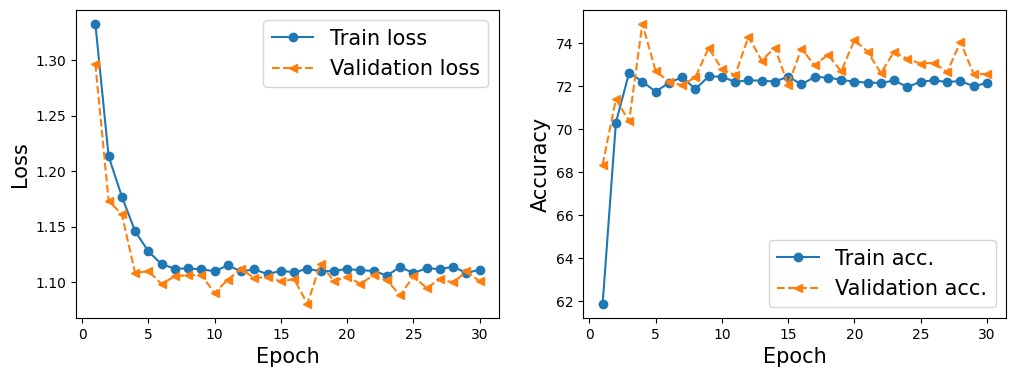

In [21]:
plot_history(seed_117_hist)

In [22]:
engine.test(test_dl)

Test Accuracy: 0.727382805742951


0.727382805742951

### Seed 192
This time I'm using the dataset class with the same augmentation as I used for the MTL model to allow for a fair comparison.

In [23]:
base_dir = './data/feature_maps_labels/'
np.random.seed(192)

train_datasets = FeatureMapDatasetImproved(base_dir, mode='train', rescale=False, augment=True)
val_test_datasets = FeatureMapDatasetImproved(base_dir, mode='valid', rescale=False, augment=True)

valid_datasets, test_datasets = random_split(val_test_datasets, [0.5, 0.5])

batch_size = 32
train_dl = DataLoader(train_datasets, batch_size, shuffle=True, num_workers=4)
valid_dl = DataLoader(valid_datasets, batch_size, shuffle=True, num_workers=4)
test_dl = DataLoader(test_datasets, batch_size, shuffle=False, num_workers=2)

In [24]:
np.random.seed(192)

criterion = nn.CrossEntropyLoss(weight=class_weights)
model = ResNet50_GRU(hidden_size=1024, num_layers=2, dropout=0.7, unfreeze_L3=True, unfreeze_L4=True)
optimizer = optim.Adam(model.parameters(), lr=0.00132603, weight_decay=0.00111036)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.304855)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

In [25]:
engine = ResNet50_GRU_engine(model, optimizer, scheduler, criterion, device)

Train time: 153mins 3.1s

In [26]:
np.random.seed(192)

seed_192_hist = engine.train_validation(train_dl, valid_dl, epochs=30, save_path='./model_checkpoint/seed_192_driver1D_ResNet50GRU_chkpt.pth')

np.save('./model_checkpoint/seed_192_driver1D_ResNet50GRU_history.npy', np.array(seed_192_hist))

   Epoch [1/30], Train Loss: 1.3785, Train Accuracy: 44.48%, Val Loss: 1.3644, Val Accuracy: 34.19%
   Epoch [2/30], Train Loss: 1.2574, Train Accuracy: 59.02%, Val Loss: 1.2440, Val Accuracy: 72.07%
   Epoch [3/30], Train Loss: 1.1888, Train Accuracy: 68.11%, Val Loss: 1.1913, Val Accuracy: 71.93%
   Epoch [4/30], Train Loss: 1.1424, Train Accuracy: 70.01%, Val Loss: 1.1485, Val Accuracy: 68.68%
   Epoch [5/30], Train Loss: 1.1237, Train Accuracy: 70.85%, Val Loss: 1.1433, Val Accuracy: 72.74%
   Epoch [6/30], Train Loss: 1.1101, Train Accuracy: 71.94%, Val Loss: 1.1188, Val Accuracy: 73.33%
   Epoch [7/30], Train Loss: 1.1088, Train Accuracy: 72.11%, Val Loss: 1.1080, Val Accuracy: 71.52%
   Epoch [8/30], Train Loss: 1.1058, Train Accuracy: 72.18%, Val Loss: 1.1188, Val Accuracy: 72.92%
   Epoch [9/30], Train Loss: 1.1105, Train Accuracy: 72.23%, Val Loss: 1.1130, Val Accuracy: 70.62%
   Epoch [10/30], Train Loss: 1.1089, Train Accuracy: 72.18%, Val Loss: 1.1195, Val Accuracy: 73.61%

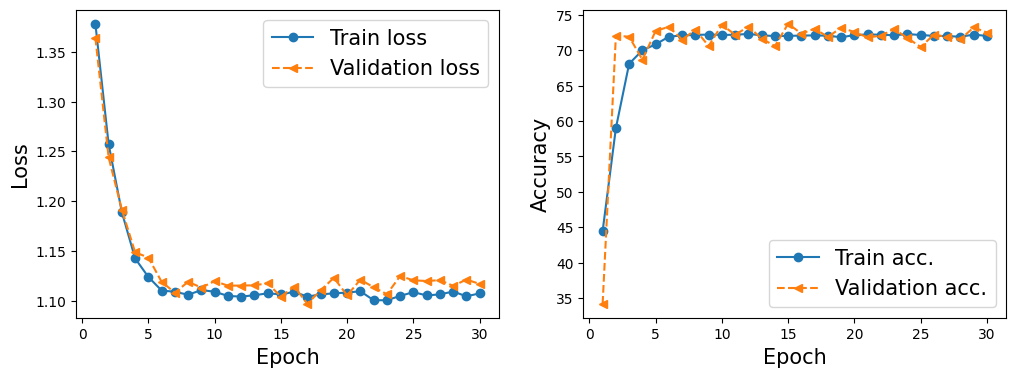

In [27]:
plot_history(seed_192_hist)

In [28]:
engine.test(test_dl)

Test Accuracy: 0.7334371216052586


0.7334371216052586